##Spam Mail Classification Using NLP


##Importing Libaries

In [2]:
import pandas as pd
import nltk

##Mount the Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Read the Data set

In [5]:
 df= pd.read_csv('/content/drive/MyDrive/ML/NLP/spam classification/spam.csv', encoding='latin-1')

In [6]:
df.shape

(5572, 5)

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Preprocessing- Step 01

In [8]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [9]:
df.rename(columns={'v1':'label', 'v2':'message'}, inplace=True)

In [10]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
df= df.drop_duplicates(keep='first')

In [13]:
df.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4516   4516                         Rofl. Its true to its name    1
spam      653    653  This is the 2nd time we have tried 2 contact u...    1

In [14]:
df["Length"] = df["message"].apply(len)

<ipython-input-14-c2fb7876a86e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Length"] = df["message"].apply(len)


In [15]:
df.sample(5)

,label,message,Length
2135,ham,"Carlos took a while (again), we leave in a minute",49
5415,ham,You should get more chicken broth if you want ...,90
1911,ham,Lol grr my mom is taking forever with my presc...,92
3361,ham,No messages on her phone. I'm holding it now,44
2828,spam,Send a logo 2 ur lover - 2 names joined by a h...,160


#Data Visualization

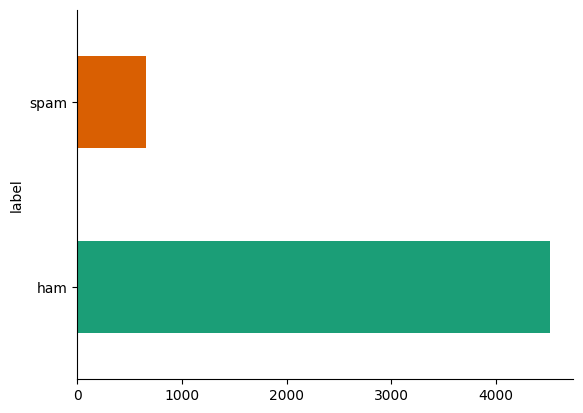

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

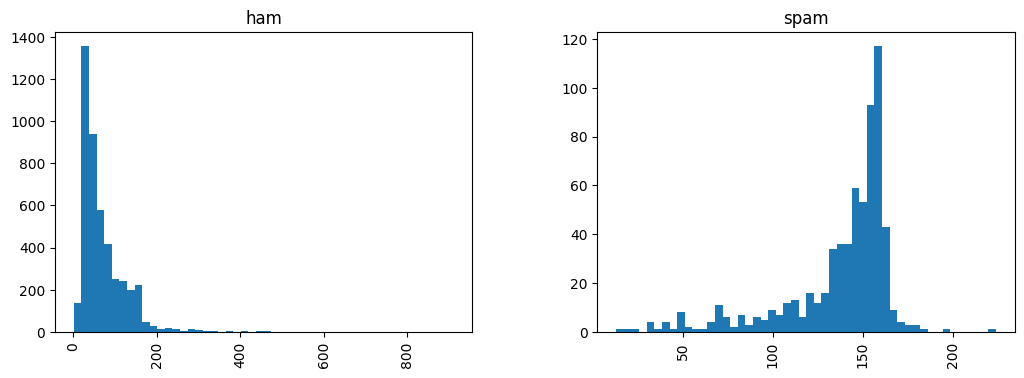

In [17]:
df.hist(column='Length', by='label', bins=50, figsize=(12,4))

#Preprocessing - Step 2

In [18]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Preprocessing Tasks



*   Lowercase
*   Tokenization
*   Removing Special characters
*   Removing Stop words and punctuations
*   Stemming




In [19]:
import string

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
   if i.isalnum():
    y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [20]:
df["Cleaned_Message"] = df["message"].apply(clean_text)

In [21]:
df.head()

,label,message,Length,Cleaned_Message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


#Feature Extraction

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tf_vec = TfidfVectorizer(max_features=3000)
X= tf_vec.fit_transform(df['Cleaned_Message']).toarray()

In [24]:
X.shape

(5169, 3000)

In [25]:
Y = df['label'].values

#Model Training

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [28]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

#Check Accuracy

In [29]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9709864603481625
